# Importing and Merging Data 

In [105]:
#importing data
import pandas as pd

sample_submission = pd.read_csv('/workspaces/scLee123/sample_submission.csv')

final_test_data = pd.read_csv('/workspaces/scLee123/Test.csv')

original_data = pd.read_csv('/workspaces/scLee123/Train.csv')#대출을 갚았던 아니던 대출 기록이 있는 거래들

masked_final = pd.read_csv('/workspaces/scLee123/unlinked_masked_final.csv') # e-commerce transactions made by customers who have a history of (or are currently involved in) e-commerce transactions financed by loans, but the specific transactions you're focusing on are not themselves financed by any loans. This could be relevant in analyzing customer behavior, credit risk, or spending patterns for businesses or financial institutions.

variables = pd.read_csv('/workspaces/scLee123/VariableDefinitions.csv')

In [4]:
variables

,Variable,Definition
0,CustomerId,Unique number identifying the customer on plat...
1,TransactionStartTime,Transaction start time
2,Value,Value of transaction
3,Amount,Value of Transaction with charges
4,TransactionId,Unique transaction identifier on platform
5,BatchId,Identifier for bulk transactions being done on...
6,SubscriptionId,You can have one account with multiple subscri...
7,CurrencyCode,Country currency
8,CountryCode,Numerical geographical code of country
9,ProviderId,Source provider of Item bought


# Explore the data


In [5]:
original_data.head()

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
0,CustomerId_27,2018-09-21 12:17:39,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustomerId_27,2018-09-25 09:20:29,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CustomerId_27,2018-09-25 10:33:31,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CustomerId_27,2018-09-27 10:26:41,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CustomerId_27,2018-09-27 12:44:21,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerId             2100 non-null   object 
 1   TransactionStartTime   2100 non-null   object 
 2   Value                  2100 non-null   float64
 3   Amount                 2100 non-null   float64
 4   TransactionId          2100 non-null   object 
 5   BatchId                2100 non-null   object 
 6   SubscriptionId         2100 non-null   object 
 7   CurrencyCode           2100 non-null   object 
 8   CountryCode            2100 non-null   int64  
 9   ProviderId             2100 non-null   object 
 10  ProductId              2100 non-null   object 
 11  ProductCategory        2100 non-null   object 
 12  ChannelId              2100 non-null   object 
 13  TransactionStatus      2100 non-null   int64  
 14  IssuedDateLoan         1488 non-null   object 
 15  Amou

In [7]:
masked_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16327 entries, 0 to 16326
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         16327 non-null  object 
 1   BatchId               16327 non-null  object 
 2   CustomerId            16327 non-null  object 
 3   CurrencyCode          16327 non-null  object 
 4   CountryCode           16327 non-null  int64  
 5   ProviderId            16327 non-null  object 
 6   ProductId             16327 non-null  object 
 7   ProductCategory       16327 non-null  object 
 8   ChannelId             16327 non-null  object 
 9   Amount                16327 non-null  float64
 10  Value                 16327 non-null  float64
 11  TransactionStartTime  16327 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 1.5+ MB


In [8]:
original_data.describe()

,Value,Amount,CountryCode,TransactionStatus,AmountLoan,IsFinalPayBack,IsThirdPartyConfirmed,IsDefaulted
count,2.100000e+03,2.100000e+03,2100.0,2100.000000,1.488000e+03,1488.000000,1488.000000,1488.000000
mean,5.302947e+04,-5.291354e+04,256.0,0.708571,1.182725e+04,0.731855,0.982527,0.119624
std,1.539498e+05,1.539653e+05,0.0,0.454529,7.666506e+04,0.443143,0.131070,0.324630
min,1.000000e+02,-2.500000e+06,256.0,0.000000,5.000000e+01,0.000000,0.000000,0.000000
25%,1.000000e+03,-1.200000e+04,256.0,0.000000,1.113750e+03,0.000000,1.000000,0.000000
50%,3.500000e+03,-3.500000e+03,256.0,1.000000,2.800000e+03,1.000000,1.000000,0.000000
75%,1.200000e+04,-1.000000e+03,256.0,1.000000,1.050000e+04,1.000000,1.000000,0.000000
max,2.500000e+06,-1.000000e+02,256.0,1.000000,2.760000e+06,1.000000,1.000000,1.000000


In [9]:
# Drop Currencycode, CountryCode,ProviderId, ChannelId, Currency
#original_data['CurrencyCode'].value_counts()
#original_data['CountryCode'].value_counts()
original_data['LoanApplicationId'].value_counts()

LoanApplicationId
LoanApplicationId_354     12
LoanApplicationId_1228    11
LoanApplicationId_688     11
LoanApplicationId_997     10
LoanApplicationId_1261     9
                          ..
LoanApplicationId_249      1
LoanApplicationId_840      1
LoanApplicationId_1513     1
LoanApplicationId_287      1
LoanApplicationId_57       1
Name: count, Length: 1156, dtype: int64

In [106]:
#There are differences in train set and test set. Therfore I am just going to match those two training set.

original_data = original_data.drop(['AmountLoan', 'Currency', 'PaidOnDate', 'IsFinalPayBack', 'DueDate', 'PayBackId', 'IsThirdPartyConfirmed'], axis = 1)

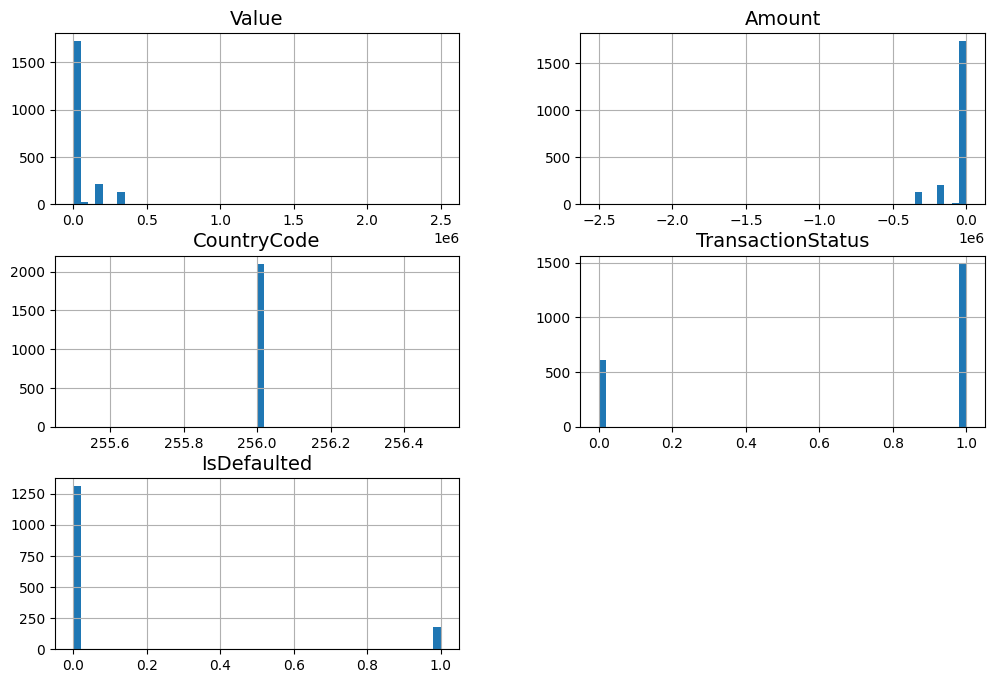

In [107]:
# Examine distributions using histograms
import matplotlib.pyplot as plt


plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

original_data.hist(bins=50, figsize=(12, 8))
plt.show()

# Data Presprocessing

In [108]:
original_data

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStatus,IssuedDateLoan,LoanId,InvestorId,LoanApplicationId,ThirdPartyId,IsDefaulted
0,CustomerId_27,2018-09-21 12:17:39,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN
1,CustomerId_27,2018-09-25 09:20:29,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN
2,CustomerId_27,2018-09-25 10:33:31,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN
3,CustomerId_27,2018-09-27 10:26:41,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN
4,CustomerId_27,2018-09-27 12:44:21,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,CustomerId_28,2019-03-30 21:55:11,2000.0,-2000.0,TransactionId_1185,BatchId_2069,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_8,data_bundles,ChannelId_1,1,2019-03-30 21:55:10,LoanId_293,InvestorId_1,LoanApplicationId_524,ThirdPartyId_857,0.0
2096,CustomerId_28,2019-03-30 23:54:07,5000.0,-5000.0,TransactionId_1824,BatchId_1552,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-30 23:54:06,LoanId_1040,InvestorId_1,LoanApplicationId_1441,ThirdPartyId_958,0.0
2097,CustomerId_34,2019-03-31 05:40:10,5000.0,-5000.0,TransactionId_2507,BatchId_1093,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_3,airtime,ChannelId_1,1,2019-03-31 05:40:09,LoanId_1585,InvestorId_1,LoanApplicationId_1466,ThirdPartyId_1981,0.0
2098,CustomerId_346,2019-03-31 09:37:19,1500.0,-1500.0,TransactionId_540,BatchId_1239,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_8,data_bundles,ChannelId_1,1,2019-03-31 09:37:18,LoanId_1314,InvestorId_1,LoanApplicationId_1389,ThirdPartyId_705,0.0


In [109]:
#Finding the columns that only has one unique value.
unique_counts = original_data.nunique()

single_unique_columns = unique_counts[unique_counts == 1].index.tolist()

print(single_unique_columns)

['CurrencyCode', 'CountryCode', 'ProviderId', 'ChannelId']


In [110]:
# making training dataset with out the values that has only one unique value.
train_data = original_data.drop(['CurrencyCode','CountryCode','ProviderId','ChannelId'],axis=1)

In [111]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerId            2100 non-null   object 
 1   TransactionStartTime  2100 non-null   object 
 2   Value                 2100 non-null   float64
 3   Amount                2100 non-null   float64
 4   TransactionId         2100 non-null   object 
 5   BatchId               2100 non-null   object 
 6   SubscriptionId        2100 non-null   object 
 7   ProductId             2100 non-null   object 
 8   ProductCategory       2100 non-null   object 
 9   TransactionStatus     2100 non-null   int64  
 10  IssuedDateLoan        1488 non-null   object 
 11  LoanId                1488 non-null   object 
 12  InvestorId            1488 non-null   object 
 13  LoanApplicationId     1483 non-null   object 
 14  ThirdPartyId          1486 non-null   object 
 15  IsDefaulted          

In [112]:
corr_matrix = train_data.corr(numeric_only=True)

corr_matrix["IsDefaulted"].sort_values(ascending=False)



IsDefaulted          1.000000
Value                0.333220
Amount              -0.333401
TransactionStatus         NaN
Name: IsDefaulted, dtype: float64

# Handling NAs

In [113]:
import pandas as pd

# Example DataFrame
# original_data = pd.DataFrame(...)

# Null 값이 있는 컬럼 찾기
null_columns = train_data.columns[train_data.isnull().any()].tolist()

print(null_columns)

['IssuedDateLoan', 'LoanId', 'InvestorId', 'LoanApplicationId', 'ThirdPartyId', 'IsDefaulted']


In [114]:
pd.set_option('display.max_columns', None) # show every columns
train_data = train_data.drop(train_data[train_data['TransactionStatus'] == 0].index) #drop every rows that transactionstatus ==0
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1488 entries, 9 to 2099
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerId            1488 non-null   object 
 1   TransactionStartTime  1488 non-null   object 
 2   Value                 1488 non-null   float64
 3   Amount                1488 non-null   float64
 4   TransactionId         1488 non-null   object 
 5   BatchId               1488 non-null   object 
 6   SubscriptionId        1488 non-null   object 
 7   ProductId             1488 non-null   object 
 8   ProductCategory       1488 non-null   object 
 9   TransactionStatus     1488 non-null   int64  
 10  IssuedDateLoan        1488 non-null   object 
 11  LoanId                1488 non-null   object 
 12  InvestorId            1488 non-null   object 
 13  LoanApplicationId     1483 non-null   object 
 14  ThirdPartyId          1486 non-null   object 
 15  IsDefaulted           1488

In [115]:
# Drop 9 rows with nan
train_data = train_data.dropna()
train_data.isnull().sum()

CustomerId              0
TransactionStartTime    0
Value                   0
Amount                  0
TransactionId           0
BatchId                 0
SubscriptionId          0
ProductId               0
ProductCategory         0
TransactionStatus       0
IssuedDateLoan          0
LoanId                  0
InvestorId              0
LoanApplicationId       0
ThirdPartyId            0
IsDefaulted             0
dtype: int64

# Correlation analysis and column dropping

In [116]:
corr_matrix = train_data.corr(numeric_only=True)

corr_matrix["IsDefaulted"].sort_values(ascending=False)

IsDefaulted          1.000000
Value                0.331752
Amount              -0.331933
TransactionStatus         NaN
Name: IsDefaulted, dtype: float64

In [117]:
train_data.head()

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,ProductId,ProductCategory,TransactionStatus,IssuedDateLoan,LoanId,InvestorId,LoanApplicationId,ThirdPartyId,IsDefaulted
15,CustomerId_233,2018-10-22 16:04:25,5000.0,-5000.0,TransactionId_2632,BatchId_775,SubscriptionId_4,ProductId_7,airtime,1,2018-10-22 16:04:22,LoanId_317,InvestorId_3,LoanApplicationId_1629,ThirdPartyId_1010,0.0
17,CustomerId_305,2018-10-23 13:12:23,500.0,-500.0,TransactionId_1297,BatchId_2016,SubscriptionId_1,ProductId_7,airtime,1,2018-10-23 13:12:21,LoanId_1619,InvestorId_2,LoanApplicationId_136,ThirdPartyId_1566,0.0
18,CustomerId_27,2018-10-23 15:20:58,1000.0,-1000.0,TransactionId_1367,BatchId_1675,SubscriptionId_1,ProductId_7,airtime,1,2018-10-23 15:20:55,LoanId_1438,InvestorId_2,LoanApplicationId_1171,ThirdPartyId_1265,0.0
19,CustomerId_27,2018-10-23 15:31:27,500.0,-500.0,TransactionId_871,BatchId_2449,SubscriptionId_1,ProductId_7,airtime,1,2018-10-24 06:34:00,LoanId_1304,InvestorId_2,LoanApplicationId_702,ThirdPartyId_1962,0.0
20,CustomerId_27,2018-10-24 06:56:02,500.0,-500.0,TransactionId_1019,BatchId_1564,SubscriptionId_1,ProductId_4,data_bundles,1,2018-10-24 06:56:00,LoanId_1436,InvestorId_2,LoanApplicationId_508,ThirdPartyId_2008,0.0


In [119]:
#Drop every ids and codes or low correlated values from the training set
train_data2 = train_data.drop(['BatchId', 'SubscriptionId', 'TransactionStatus', 'LoanId', 'InvestorId', 'LoanApplicationId', 'ThirdPartyId', 'ProductId'],axis = 1)

train_data2

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,ProductCategory,IssuedDateLoan,IsDefaulted
15,CustomerId_233,2018-10-22 16:04:25,5000.0,-5000.0,TransactionId_2632,airtime,2018-10-22 16:04:22,0.0
17,CustomerId_305,2018-10-23 13:12:23,500.0,-500.0,TransactionId_1297,airtime,2018-10-23 13:12:21,0.0
18,CustomerId_27,2018-10-23 15:20:58,1000.0,-1000.0,TransactionId_1367,airtime,2018-10-23 15:20:55,0.0
19,CustomerId_27,2018-10-23 15:31:27,500.0,-500.0,TransactionId_871,airtime,2018-10-24 06:34:00,0.0
20,CustomerId_27,2018-10-24 06:56:02,500.0,-500.0,TransactionId_1019,data_bundles,2018-10-24 06:56:00,0.0
...,...,...,...,...,...,...,...,...
2095,CustomerId_28,2019-03-30 21:55:11,2000.0,-2000.0,TransactionId_1185,data_bundles,2019-03-30 21:55:10,0.0
2096,CustomerId_28,2019-03-30 23:54:07,5000.0,-5000.0,TransactionId_1824,airtime,2019-03-30 23:54:06,0.0
2097,CustomerId_34,2019-03-31 05:40:10,5000.0,-5000.0,TransactionId_2507,airtime,2019-03-31 05:40:09,0.0
2098,CustomerId_346,2019-03-31 09:37:19,1500.0,-1500.0,TransactionId_540,data_bundles,2019-03-31 09:37:18,0.0


In [120]:
# convert TransactionStartTime and IssuedDateLoan columns and make a new colum that subtract the time.


# Convert 'TransactionStartTime' and 'IssuedDateLoan' to datetime
train_data2['TransactionStartTime'] = pd.to_datetime(train_data2['TransactionStartTime'])
train_data2['IssuedDateLoan'] = pd.to_datetime(train_data2['IssuedDateLoan'])

# Create a new column with the difference between the two dates
train_data2['Transaction_LoanIssue_TimeDifference'] = train_data2['TransactionStartTime'] - train_data2['IssuedDateLoan']





there are 1303 transactions that are not difaluted, and 176 that are defaulted in train2 data set /
Every customer(8) who's made transaction first and Issued loan paid there loan

In [123]:
train_data2[train_data2['Transaction_LoanIssue_TimeDifference'] == pd.Timedelta(0)]

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,ProductCategory,IssuedDateLoan,IsDefaulted,Transaction_LoanIssue_TimeDifference
613,CustomerId_241,2019-01-04 15:32:43,3000.0,-3000.0,TransactionId_1067,airtime,2019-01-04 15:32:43,0.0,0 days
641,CustomerId_315,2019-01-08 11:26:49,1000.0,-1000.0,TransactionId_938,data_bundles,2019-01-08 11:26:49,0.0,0 days
956,CustomerId_369,2019-02-01 17:59:17,1000.0,-1000.0,TransactionId_1286,airtime,2019-02-01 17:59:17,0.0,0 days
984,CustomerId_390,2019-02-03 12:32:17,500.0,-500.0,TransactionId_731,airtime,2019-02-03 12:32:17,0.0,0 days
1443,CustomerId_15,2019-02-21 07:05:01,21800.0,-20000.0,TransactionId_253,utility_bill,2019-02-21 07:05:01,0.0,0 days
...,...,...,...,...,...,...,...,...,...
2062,CustomerId_502,2019-03-27 18:41:31,2000.0,-2000.0,TransactionId_2520,airtime,2019-03-27 18:41:31,0.0,0 days
2064,CustomerId_325,2019-03-28 06:48:07,10000.0,-10000.0,TransactionId_759,airtime,2019-03-28 06:48:07,0.0,0 days
2076,CustomerId_34,2019-03-28 17:37:53,4720.0,-4000.0,TransactionId_2349,utility_bill,2019-03-28 17:37:53,0.0,0 days
2083,CustomerId_258,2019-03-29 08:13:52,10000.0,-10000.0,TransactionId_2464,airtime,2019-03-29 08:13:52,0.0,0 days


In [124]:
# comparing the average transaction time
# make new columns for transaction time

from datetime import datetime, timedelta


# 시간 정보만 추출합니다.
train_data2['Time'] = train_data2['TransactionStartTime'].dt.time

# 시간을 초 단위로 변환합니다.
train_data2['Seconds'] = train_data2['Time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)

# 초 단위 시간의 평균을 계산합니다.
average_seconds = train_data2['Seconds'].mean()

# 평균 시간을 시간 형태로 변환합니다.
average_time = str(timedelta(seconds=average_seconds))

average_time

'12:23:21.424713'

In [125]:
#We can drop TransactionStartTime and Time and just use Seconds for identify transactionstarttime
#Rename the Secons column to TransactionStartTime

train_data2.drop(['TransactionStartTime','Time'], axis = 1, inplace= True)
train_data2.rename(columns={'Seconds': 'TransactionStartTime'}, inplace=True)


In [126]:
train_data2

,CustomerId,Value,Amount,TransactionId,ProductCategory,IssuedDateLoan,IsDefaulted,Transaction_LoanIssue_TimeDifference,TransactionStartTime
15,CustomerId_233,5000.0,-5000.0,TransactionId_2632,airtime,2018-10-22 16:04:22,0.0,0 days 00:00:03,57865
17,CustomerId_305,500.0,-500.0,TransactionId_1297,airtime,2018-10-23 13:12:21,0.0,0 days 00:00:02,47543
18,CustomerId_27,1000.0,-1000.0,TransactionId_1367,airtime,2018-10-23 15:20:55,0.0,0 days 00:00:03,55258
19,CustomerId_27,500.0,-500.0,TransactionId_871,airtime,2018-10-24 06:34:00,0.0,-1 days +08:57:27,55887
20,CustomerId_27,500.0,-500.0,TransactionId_1019,data_bundles,2018-10-24 06:56:00,0.0,0 days 00:00:02,24962
...,...,...,...,...,...,...,...,...,...
2095,CustomerId_28,2000.0,-2000.0,TransactionId_1185,data_bundles,2019-03-30 21:55:10,0.0,0 days 00:00:01,78911
2096,CustomerId_28,5000.0,-5000.0,TransactionId_1824,airtime,2019-03-30 23:54:06,0.0,0 days 00:00:01,86047
2097,CustomerId_34,5000.0,-5000.0,TransactionId_2507,airtime,2019-03-31 05:40:09,0.0,0 days 00:00:01,20410
2098,CustomerId_346,1500.0,-1500.0,TransactionId_540,data_bundles,2019-03-31 09:37:18,0.0,0 days 00:00:01,34639


Comparing isdefaulted == 0 with 1

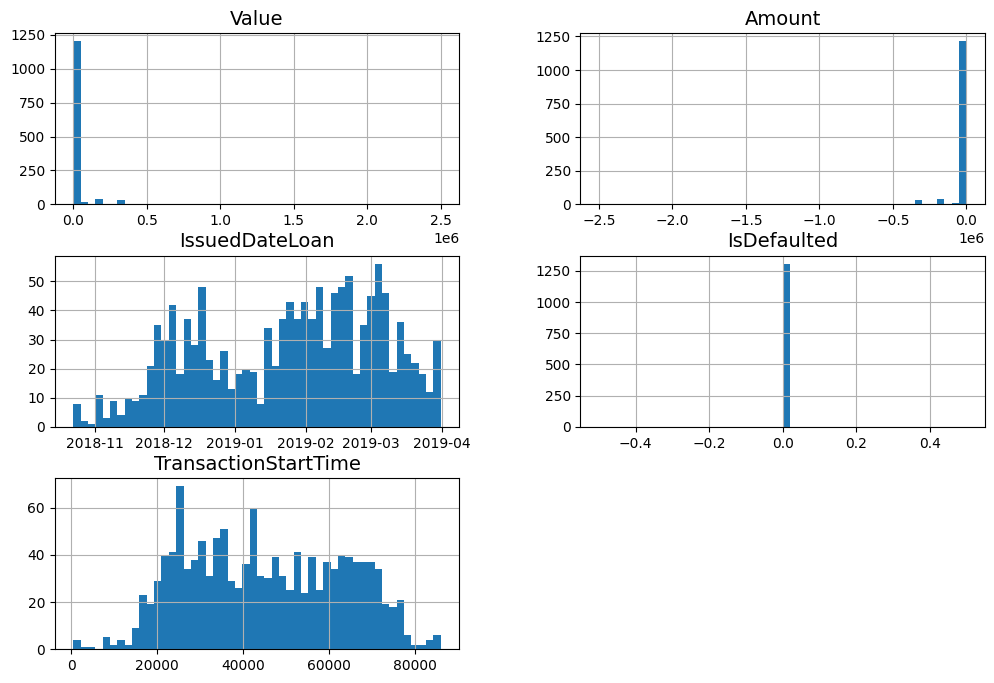

In [127]:
# not defaulted data eda

import pandas as pd
import matplotlib.pyplot as plt

not_defaulted_data = train_data2[train_data2['IsDefaulted'] == 0]

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

not_defaulted_data.hist(bins=50, figsize=(12, 8))
plt.show()

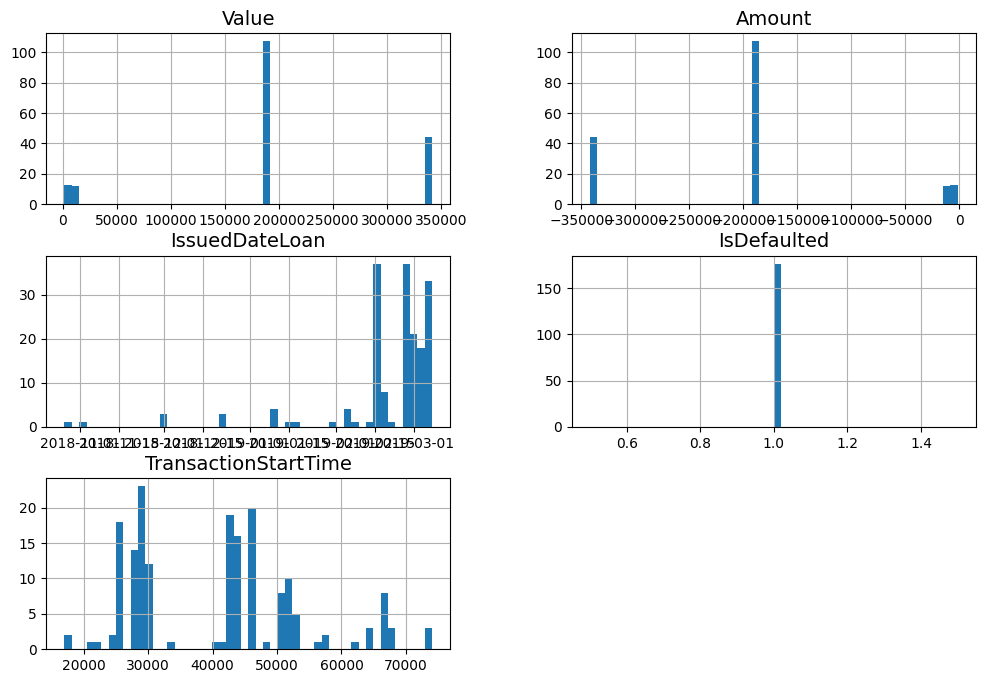

In [128]:
# is defaulted data eda

import pandas as pd
import matplotlib.pyplot as plt

defaulted_data = train_data2[train_data2['IsDefaulted'] == 1]

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

defaulted_data.hist(bins=50, figsize=(12, 8))
plt.show()

In [129]:
defaulted_data

,CustomerId,Value,Amount,TransactionId,ProductCategory,IssuedDateLoan,IsDefaulted,Transaction_LoanIssue_TimeDifference,TransactionStartTime
26,CustomerId_474,10000.0,-10000.0,TransactionId_2299,airtime,2018-10-26 09:19:00,1.0,0 days 00:00:02,33542
37,CustomerId_474,5000.0,-5000.0,TransactionId_1452,airtime,2018-11-01 17:56:48,1.0,0 days 00:00:02,64610
202,CustomerId_429,3000.0,-3000.0,TransactionId_358,airtime,2018-11-30 06:56:40,1.0,0 days 00:00:03,25003
220,CustomerId_434,14000.0,-14000.0,TransactionId_1954,airtime,2018-11-30 15:55:36,1.0,0 days 00:00:02,57338
221,CustomerId_434,14000.0,-14000.0,TransactionId_1954,airtime,2018-11-30 15:55:36,1.0,0 days 00:00:02,57338
...,...,...,...,...,...,...,...,...,...
1846,CustomerId_414,192000.0,-192000.0,TransactionId_2332,retail,2019-03-07 08:14:03,1.0,0 days 00:00:01,29644
1847,CustomerId_158,192000.0,-192000.0,TransactionId_2374,retail,2019-03-07 08:16:10,1.0,0 days 00:00:01,29771
1848,CustomerId_158,192000.0,-192000.0,TransactionId_2374,retail,2019-03-07 08:16:10,1.0,0 days 00:00:01,29771
1849,CustomerId_158,192000.0,-192000.0,TransactionId_2374,retail,2019-03-07 08:16:10,1.0,0 days 00:00:01,29771


In [132]:
# comparing mean value 

print(defaulted_data['Value'].mean())
print(not_defaulted_data["Value"].mean())
print("--------")
print(defaulted_data['Amount'].mean())
print(not_defaulted_data["Amount"].mean())
print('-----------')
print(defaulted_data['TransactionStartTime'].mean())
print(not_defaulted_data['TransactionStartTime'].mean())
#print('------------')
#print(defaulted_data['AmountLoan'].mean())
#print(not_defaulted_data['AmountLoan'].mean())


# We can see that not defaulted group has significantly low mean in Value column
# Value column can play important roll in distingushing people who are defaulted or not
# averge transaction time for defaulted group is about 11:30 AM
# averge transaction time for not_defaulted group is about 1:00 PM
# customer who are defealted has about $6000 more averge abount of loan. - amount is not in the test set

203311.29545454544
31756.841379310346
--------
-203295.44318181818
-31633.534865900383
-----------
40747.09659090909
45121.24214559387


In [136]:
# 그냥 여기서 다 drop하고 모델 만들어보자

final_train_model = train_data2.drop(['CustomerId','TransactionId','IssuedDateLoan','Transaction_LoanIssue_TimeDifference'] , axis = 1)


,Value,Amount,ProductCategory,IsDefaulted,TransactionStartTime
15,5000.0,-5000.0,airtime,0.0,57865
17,500.0,-500.0,airtime,0.0,47543
18,1000.0,-1000.0,airtime,0.0,55258
19,500.0,-500.0,airtime,0.0,55887
20,500.0,-500.0,data_bundles,0.0,24962
...,...,...,...,...,...
2095,2000.0,-2000.0,data_bundles,0.0,78911
2096,5000.0,-5000.0,airtime,0.0,86047
2097,5000.0,-5000.0,airtime,0.0,20410
2098,1500.0,-1500.0,data_bundles,0.0,34639


In [137]:
#ProductCategory one-hot encoding

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

category_one_hot = encoder.fit_transform(final_train_model[['ProductCategory']])
df_one_hot = pd.DataFrame(category_one_hot, columns=encoder.get_feature_names_out(['ProductCategory']))

# Combine the original dataframe with one-hot-encoded dataframe
df_combined = pd.concat([final_train_model, df_one_hot], axis=1)
df_combined

/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Value,Amount,ProductCategory,IsDefaulted,TransactionStartTime,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_retail,ProductCategory_tv,ProductCategory_utility_bill
15,5000.0,-5000.0,airtime,0.0,57865.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17,500.0,-500.0,airtime,0.0,47543.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
18,1000.0,-1000.0,airtime,0.0,55258.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19,500.0,-500.0,airtime,0.0,55887.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
20,500.0,-500.0,data_bundles,0.0,24962.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1474,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1475,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1476,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1478,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
#na 값 위에 값으로 일치

df_combined.fillna(method='ffill', inplace=True)
df_combined.drop(['ProductCategory'], axis=1, inplace =  True)
df_combined

/tmp/ipykernel_5040/3801701775.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_combined.fillna(method='ffill', inplace=True)


,Value,Amount,IsDefaulted,TransactionStartTime,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_retail,ProductCategory_tv,ProductCategory_utility_bill
15,5000.0,-5000.0,0.0,57865.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17,500.0,-500.0,0.0,47543.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
18,1000.0,-1000.0,0.0,55258.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19,500.0,-500.0,0.0,55887.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
20,500.0,-500.0,0.0,24962.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1474,1000.0,-1000.0,0.0,44193.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1475,1000.0,-1000.0,0.0,44193.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1476,1000.0,-1000.0,0.0,44193.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1478,1000.0,-1000.0,0.0,44193.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
# split the data

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load a built-in dataset (Iris dataset)
X = df_combined.drop(['IsDefaulted'], axis=1) 
y = df_combined['IsDefaulted']

# Example without a fixed random seed
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a simple model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9095607235142119

Removing outlier

In [57]:
# If we are gonna remove the outliers, We should remove the ones with more than $400000 value
# train_data2 = train_data2[train_data2['Value'] <= 400000]


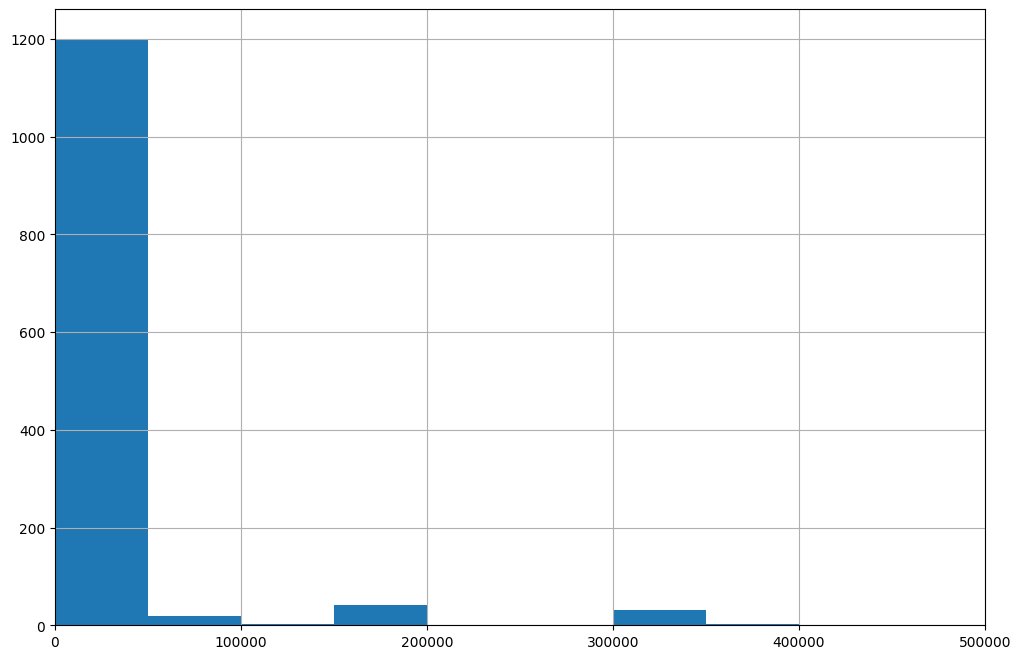

In [29]:
#check if the Value and Amount are always same
# No, not  always same. If there are 
train_data2[train_data2['Value'] + train_data2['Amount'] != 0].head(20)


,CustomerId,TransactionStartTime,Value,Amount,TransactionId,ProductCategory,IssuedDateLoan,AmountLoan,PaidOnDate,IsFinalPayBack,DueDate,IsThirdPartyConfirmed,IsDefaulted,Transaction_LoanIssue_TimeDifference
28,CustomerId_432,2018-10-26 16:12:44,31766.0,-30840.0,TransactionId_2128,tv,2018-10-26 16:12:42,30840.0,2019-04-26 16:24:03,1.0,2018-11-25 16:12:40,1.0,0.0,0 days 00:00:02
35,CustomerId_405,2018-11-01 16:12:41,53500.0,-50000.0,TransactionId_549,utility_bill,2018-11-01 16:12:39,63398.0,2018-12-06 09:26:57,0.0,2018-12-01 16:12:37,1.0,0.0,0 days 00:00:02
36,CustomerId_405,2018-11-01 16:12:41,53500.0,-50000.0,TransactionId_549,utility_bill,2018-11-01 16:12:39,2942.0,2018-12-11 17:00:26,1.0,2018-12-01 16:12:37,1.0,0.0,0 days 00:00:02
49,CustomerId_144,2018-11-03 00:09:26,11200.0,-10000.0,TransactionId_695,utility_bill,2018-11-03 00:09:24,11760.0,2018-11-08 09:41:59,0.0,2018-12-03 00:09:22,1.0,0.0,0 days 00:00:02
50,CustomerId_144,2018-11-03 00:09:26,11200.0,-10000.0,TransactionId_695,utility_bill,2018-11-03 00:09:24,168.0,2018-11-08 16:54:45,1.0,2018-12-03 00:09:22,1.0,0.0,0 days 00:00:02
71,CustomerId_136,2018-11-08 20:40:08,21800.0,-20000.0,TransactionId_2290,utility_bill,2018-11-08 20:40:06,22000.0,2018-12-07 17:10:14,0.0,2018-12-08 20:40:01,1.0,0.0,0 days 00:00:02
72,CustomerId_136,2018-11-08 20:40:08,21800.0,-20000.0,TransactionId_2290,utility_bill,2018-11-08 20:40:06,3833.0,2018-12-08 07:34:43,1.0,2018-12-08 20:40:01,1.0,0.0,0 days 00:00:02
78,CustomerId_144,2018-11-09 12:54:52,2145.0,-1500.0,TransactionId_817,utility_bill,2018-11-09 12:54:49,2521.0,2018-12-07 08:41:44,1.0,2018-12-09 12:54:45,1.0,0.0,0 days 00:00:03
83,CustomerId_388,2018-11-11 11:39:11,24660.0,-22000.0,TransactionId_1806,utility_bill,2018-11-11 11:39:09,28606.0,2018-12-06 07:39:07,1.0,2018-12-11 11:39:03,1.0,0.0,0 days 00:00:02
84,CustomerId_405,2018-11-11 15:21:53,28840.0,-28000.0,TransactionId_2450,tv,2018-11-11 15:21:50,35004.0,2018-12-06 09:28:37,0.0,2018-12-11 15:21:47,1.0,0.0,0 days 00:00:03


In [30]:
train_data2[train_data2['IsDefaulted']==1]

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,ProductCategory,IssuedDateLoan,AmountLoan,PaidOnDate,IsFinalPayBack,DueDate,IsThirdPartyConfirmed,IsDefaulted,Transaction_LoanIssue_TimeDifference
26,CustomerId_474,2018-10-26 09:19:02,10000.0,-10000.0,TransactionId_2299,airtime,2018-10-26 09:19:00,10000.0,2019-05-16 07:25:29,1.0,2018-11-25 09:18:58,0.0,1.0,0 days 00:00:02
37,CustomerId_474,2018-11-01 17:56:50,5000.0,-5000.0,TransactionId_1452,airtime,2018-11-01 17:56:48,500.0,2019-07-15 09:12:48,0.0,2018-12-01 17:56:44,1.0,1.0,0 days 00:00:02
202,CustomerId_429,2018-11-30 06:56:43,3000.0,-3000.0,TransactionId_358,airtime,2018-11-30 06:56:40,3120.0,2018-12-01 14:41:03,0.0,2018-12-30 06:56:37,1.0,1.0,0 days 00:00:03
220,CustomerId_434,2018-11-30 15:55:38,14000.0,-14000.0,TransactionId_1954,airtime,2018-11-30 15:55:36,1000.0,2019-01-25 15:00:29,0.0,2018-12-30 15:55:33,1.0,1.0,0 days 00:00:02
221,CustomerId_434,2018-11-30 15:55:38,14000.0,-14000.0,TransactionId_1954,airtime,2018-11-30 15:55:36,1000.0,2019-01-25 15:01:48,0.0,2018-12-30 15:55:33,1.0,1.0,0 days 00:00:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1846,CustomerId_414,2019-03-07 08:14:04,192000.0,-192000.0,TransactionId_2332,retail,2019-03-07 08:14:03,50000.0,2019-04-01 11:52:40,0.0,2019-04-06 08:14:00,1.0,1.0,0 days 00:00:01
1847,CustomerId_158,2019-03-07 08:16:11,192000.0,-192000.0,TransactionId_2374,retail,2019-03-07 08:16:10,20000.0,2019-04-02 10:04:20,0.0,2019-04-06 08:16:07,1.0,1.0,0 days 00:00:01
1848,CustomerId_158,2019-03-07 08:16:11,192000.0,-192000.0,TransactionId_2374,retail,2019-03-07 08:16:10,5000.0,2019-04-02 20:25:15,0.0,2019-04-06 08:16:07,1.0,1.0,0 days 00:00:01
1849,CustomerId_158,2019-03-07 08:16:11,192000.0,-192000.0,TransactionId_2374,retail,2019-03-07 08:16:10,7000.0,2019-05-20 08:15:05,0.0,2019-04-06 08:16:07,1.0,1.0,0 days 00:00:01


In [31]:
# drop columns in masked_final too 
masked_final = masked_final.drop(['BatchId', 'CurrencyCode', 'CountryCode', 'ProviderId','ChannelId'], axis = 1)


In [32]:
masked_final.sort_values(['CustomerId']).head()

,TransactionId,CustomerId,ProductId,ProductCategory,Amount,Value,TransactionStartTime
6533,TransactionId_14804,CustomerId_1,ProductId_3,airtime,1000.0,1000.0,3/4/19 18:35:06
6547,TransactionId_7847,CustomerId_1,ProductId_3,airtime,1000.0,1000.0,3/4/19 17:55:43
6548,TransactionId_7833,CustomerId_1,ProductId_3,airtime,1000.0,1000.0,3/4/19 17:49:35
6549,TransactionId_18550,CustomerId_1,ProductId_3,airtime,1000.0,1000.0,3/4/19 17:41:56
11440,TransactionId_14051,CustomerId_1,ProductId_5,tv,180000.0,185400.0,13/2/19 8:18:26


In [33]:
masked_final.sort_values(['CustomerId']).head(80)


,TransactionId,CustomerId,ProductId,ProductCategory,Amount,Value,TransactionStartTime
6533,TransactionId_14804,CustomerId_1,ProductId_3,airtime,1000.0,1000.0,3/4/19 18:35:06
6547,TransactionId_7847,CustomerId_1,ProductId_3,airtime,1000.0,1000.0,3/4/19 17:55:43
6548,TransactionId_7833,CustomerId_1,ProductId_3,airtime,1000.0,1000.0,3/4/19 17:49:35
6549,TransactionId_18550,CustomerId_1,ProductId_3,airtime,1000.0,1000.0,3/4/19 17:41:56
11440,TransactionId_14051,CustomerId_1,ProductId_5,tv,180000.0,185400.0,13/2/19 8:18:26
...,...,...,...,...,...,...,...
12270,TransactionId_15898,CustomerId_103,ProductId_3,airtime,1000.0,1000.0,6/2/19 7:33:58
15366,TransactionId_4311,CustomerId_103,ProductId_4,data_bundles,1000.0,1000.0,12/1/19 20:00:25
16041,TransactionId_7869,CustomerId_103,ProductId_3,airtime,10000.0,10000.0,4/1/19 17:57:17
15354,TransactionId_4708,CustomerId_103,ProductId_3,airtime,1000.0,1000.0,13/1/19 4:22:33


In [34]:
# masked final 사용법
# train 데이터셋에 customer id 별로 masked_final에 거래 횟수, 거래 가격 등으로 새로운 데이터 뽑아서 쓸 수 있어.
#그거 적용한 모델로 테스트 할 수 있어?

masked_final[masked_final['CustomerId'].isin(['CustomerId_258'])]

,TransactionId,CustomerId,ProductId,ProductCategory,Amount,Value,TransactionStartTime
6460,TransactionId_10169,CustomerId_258,ProductId_10,financial_services,10000.0,10000.0,4/4/19 18:40:22


In [35]:
# 두 데이터셋의 'customer_id' 컬럼을 set으로 변환
masked_final_set = set(masked_final['CustomerId'])
train_data_set = set(train_data['CustomerId'])

# 두 set의 교집합을 찾아 겹치는 값들을 구함
overlapping_values = masked_final_set.intersection(train_data_set)

len(overlapping_values)

178

In [36]:
len(masked_final['CustomerId'].unique())

282

In [37]:

# customer id 별 쇼핑 횟수, 가격, 시간 
masked_final

,TransactionId,CustomerId,ProductId,ProductCategory,Amount,Value,TransactionStartTime
0,TransactionId_18876,CustomerId_250,ProductId_8,data_bundles,2000.0,2000.0,30/6/19 22:57:49
1,TransactionId_15089,CustomerId_423,ProductId_7,airtime,800.0,800.0,30/6/19 22:39:11
2,TransactionId_9561,CustomerId_423,ProductId_10,financial_services,2000.0,2000.0,30/6/19 22:35:53
3,TransactionId_3635,CustomerId_316,ProductId_3,airtime,1000.0,1000.0,30/6/19 19:47:00
4,TransactionId_3104,CustomerId_193,ProductId_1,airtime,5000.0,5000.0,30/6/19 19:11:01
...,...,...,...,...,...,...,...
16322,TransactionId_11472,CustomerId_282,ProductId_3,airtime,1000.0,1000.0,1/1/19 6:28:43
16323,TransactionId_18689,CustomerId_282,ProductId_8,data_bundles,2000.0,2000.0,1/1/19 5:10:25
16324,TransactionId_17879,CustomerId_282,ProductId_3,airtime,2000.0,2000.0,1/1/19 4:54:08
16325,TransactionId_6532,CustomerId_180,ProductId_3,airtime,2000.0,2000.0,1/1/19 0:46:25


In [38]:
train_data

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,ProductId,ProductCategory,TransactionStatus,IssuedDateLoan,AmountLoan,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
15,CustomerId_233,2018-10-22 16:04:25,5000.0,-5000.0,TransactionId_2632,BatchId_775,SubscriptionId_4,ProductId_7,airtime,1,2018-10-22 16:04:22,5375.0,LoanId_317,2018-10-30 06:49:57,1.0,InvestorId_3,2018-11-21 16:03:32,LoanApplicationId_1629,PayBackId_1719,ThirdPartyId_1010,0.0,0.0
17,CustomerId_305,2018-10-23 13:12:23,500.0,-500.0,TransactionId_1297,BatchId_2016,SubscriptionId_1,ProductId_7,airtime,1,2018-10-23 13:12:21,543.0,LoanId_1619,2018-10-23 13:18:42,1.0,InvestorId_2,2018-11-22 13:12:16,LoanApplicationId_136,PayBackId_725,ThirdPartyId_1566,0.0,0.0
18,CustomerId_27,2018-10-23 15:20:58,1000.0,-1000.0,TransactionId_1367,BatchId_1675,SubscriptionId_1,ProductId_7,airtime,1,2018-10-23 15:20:55,1085.0,LoanId_1438,2018-10-23 15:26:58,1.0,InvestorId_2,2018-11-22 15:20:53,LoanApplicationId_1171,PayBackId_1085,ThirdPartyId_1265,0.0,0.0
19,CustomerId_27,2018-10-23 15:31:27,500.0,-500.0,TransactionId_871,BatchId_2449,SubscriptionId_1,ProductId_7,airtime,1,2018-10-24 06:34:00,543.0,LoanId_1304,2018-10-24 06:38:49,1.0,InvestorId_2,2018-11-23 06:33:57,LoanApplicationId_702,PayBackId_763,ThirdPartyId_1962,0.0,0.0
20,CustomerId_27,2018-10-24 06:56:02,500.0,-500.0,TransactionId_1019,BatchId_1564,SubscriptionId_1,ProductId_4,data_bundles,1,2018-10-24 06:56:00,543.0,LoanId_1436,2018-10-24 07:01:48,1.0,InvestorId_2,2018-11-23 06:55:58,LoanApplicationId_508,PayBackId_1228,ThirdPartyId_2008,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,CustomerId_28,2019-03-30 21:55:11,2000.0,-2000.0,TransactionId_1185,BatchId_2069,SubscriptionId_7,ProductId_8,data_bundles,1,2019-03-30 21:55:10,2370.0,LoanId_293,2019-04-29 14:35:17,1.0,InvestorId_1,2019-04-29 21:55:06,LoanApplicationId_524,PayBackId_1106,ThirdPartyId_857,1.0,0.0
2096,CustomerId_28,2019-03-30 23:54:07,5000.0,-5000.0,TransactionId_1824,BatchId_1552,SubscriptionId_7,ProductId_7,airtime,1,2019-03-30 23:54:06,5925.0,LoanId_1040,2019-04-29 14:32:37,1.0,InvestorId_1,2019-04-29 23:53:57,LoanApplicationId_1441,PayBackId_966,ThirdPartyId_958,1.0,0.0
2097,CustomerId_34,2019-03-31 05:40:10,5000.0,-5000.0,TransactionId_2507,BatchId_1093,SubscriptionId_7,ProductId_3,airtime,1,2019-03-31 05:40:09,7100.0,LoanId_1585,2019-06-15 06:20:05,1.0,InvestorId_1,2019-04-30 05:40:02,LoanApplicationId_1466,PayBackId_1271,ThirdPartyId_1981,1.0,0.0
2098,CustomerId_346,2019-03-31 09:37:19,1500.0,-1500.0,TransactionId_540,BatchId_1239,SubscriptionId_7,ProductId_8,data_bundles,1,2019-03-31 09:37:18,1733.0,LoanId_1314,2019-04-23 15:44:15,1.0,InvestorId_1,2019-04-30 09:37:15,LoanApplicationId_1389,PayBackId_945,ThirdPartyId_705,1.0,0.0


In [39]:
common_columns = final_test_data.columns.intersection(train_data.columns)
common_columns

Index(['CustomerId', 'TransactionStartTime', 'Value', 'Amount',
       'TransactionId', 'BatchId', 'SubscriptionId', 'ProductId',
       'ProductCategory', 'TransactionStatus', 'IssuedDateLoan', 'LoanId',
       'InvestorId', 'LoanApplicationId', 'ThirdPartyId'],
      dtype='object')

In [40]:
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerId            905 non-null    object 
 1   TransactionStartTime  905 non-null    object 
 2   Value                 905 non-null    float64
 3   Amount                905 non-null    float64
 4   TransactionId         905 non-null    object 
 5   BatchId               905 non-null    object 
 6   SubscriptionId        905 non-null    object 
 7   CurrencyCode          905 non-null    object 
 8   CountryCode           905 non-null    int64  
 9   ProviderId            905 non-null    object 
 10  ProductId             905 non-null    object 
 11  ProductCategory       905 non-null    object 
 12  ChannelId             905 non-null    object 
 13  TransactionStatus     905 non-null    int64  
 14  IssuedDateLoan        478 non-null    object 
 15  LoanId                4

In [41]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerId             2100 non-null   object 
 1   TransactionStartTime   2100 non-null   object 
 2   Value                  2100 non-null   float64
 3   Amount                 2100 non-null   float64
 4   TransactionId          2100 non-null   object 
 5   BatchId                2100 non-null   object 
 6   SubscriptionId         2100 non-null   object 
 7   CurrencyCode           2100 non-null   object 
 8   CountryCode            2100 non-null   int64  
 9   ProviderId             2100 non-null   object 
 10  ProductId              2100 non-null   object 
 11  ProductCategory        2100 non-null   object 
 12  ChannelId              2100 non-null   object 
 13  TransactionStatus      2100 non-null   int64  
 14  IssuedDateLoan         1488 non-null   object 
 15  Amou

In [42]:
#checking columns with na values
columns_with_nan = original_data.columns[original_data.isna().any()].tolist()
columns_with_nan

['IssuedDateLoan',
 'AmountLoan',
 'Currency',
 'LoanId',
 'PaidOnDate',
 'IsFinalPayBack',
 'InvestorId',
 'DueDate',
 'LoanApplicationId',
 'PayBackId',
 'ThirdPartyId',
 'IsThirdPartyConfirmed',
 'IsDefaulted']

In [43]:
# drop all rows containing na values
original_data = original_data.dropna()
masked_final = masked_final.dropna()

In [44]:
# checking dataset
original_data.info()
masked_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1479 entries, 15 to 2099
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerId             1479 non-null   object 
 1   TransactionStartTime   1479 non-null   object 
 2   Value                  1479 non-null   float64
 3   Amount                 1479 non-null   float64
 4   TransactionId          1479 non-null   object 
 5   BatchId                1479 non-null   object 
 6   SubscriptionId         1479 non-null   object 
 7   CurrencyCode           1479 non-null   object 
 8   CountryCode            1479 non-null   int64  
 9   ProviderId             1479 non-null   object 
 10  ProductId              1479 non-null   object 
 11  ProductCategory        1479 non-null   object 
 12  ChannelId              1479 non-null   object 
 13  TransactionStatus      1479 non-null   int64  
 14  IssuedDateLoan         1479 non-null   object 
 15  AmountLo

In [45]:
masked_final

,TransactionId,CustomerId,ProductId,ProductCategory,Amount,Value,TransactionStartTime
0,TransactionId_18876,CustomerId_250,ProductId_8,data_bundles,2000.0,2000.0,30/6/19 22:57:49
1,TransactionId_15089,CustomerId_423,ProductId_7,airtime,800.0,800.0,30/6/19 22:39:11
2,TransactionId_9561,CustomerId_423,ProductId_10,financial_services,2000.0,2000.0,30/6/19 22:35:53
3,TransactionId_3635,CustomerId_316,ProductId_3,airtime,1000.0,1000.0,30/6/19 19:47:00
4,TransactionId_3104,CustomerId_193,ProductId_1,airtime,5000.0,5000.0,30/6/19 19:11:01
...,...,...,...,...,...,...,...
16322,TransactionId_11472,CustomerId_282,ProductId_3,airtime,1000.0,1000.0,1/1/19 6:28:43
16323,TransactionId_18689,CustomerId_282,ProductId_8,data_bundles,2000.0,2000.0,1/1/19 5:10:25
16324,TransactionId_17879,CustomerId_282,ProductId_3,airtime,2000.0,2000.0,1/1/19 4:54:08
16325,TransactionId_6532,CustomerId_180,ProductId_3,airtime,2000.0,2000.0,1/1/19 0:46:25


In [46]:
#masked에 있는 transaction id original에 있나 확인
value_exists = 'TransactionId_1683' in original_data['TransactionId'].values
value_exists

False

In [47]:
original_data

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStatus,IssuedDateLoan,AmountLoan,Currency,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
15,CustomerId_233,2018-10-22 16:04:25,5000.0,-5000.0,TransactionId_2632,BatchId_775,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2018-10-22 16:04:22,5375.0,UGX,LoanId_317,2018-10-30 06:49:57,1.0,InvestorId_3,2018-11-21 16:03:32,LoanApplicationId_1629,PayBackId_1719,ThirdPartyId_1010,0.0,0.0
17,CustomerId_305,2018-10-23 13:12:23,500.0,-500.0,TransactionId_1297,BatchId_2016,SubscriptionId_1,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2018-10-23 13:12:21,543.0,UGX,LoanId_1619,2018-10-23 13:18:42,1.0,InvestorId_2,2018-11-22 13:12:16,LoanApplicationId_136,PayBackId_725,ThirdPartyId_1566,0.0,0.0
18,CustomerId_27,2018-10-23 15:20:58,1000.0,-1000.0,TransactionId_1367,BatchId_1675,SubscriptionId_1,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2018-10-23 15:20:55,1085.0,UGX,LoanId_1438,2018-10-23 15:26:58,1.0,InvestorId_2,2018-11-22 15:20:53,LoanApplicationId_1171,PayBackId_1085,ThirdPartyId_1265,0.0,0.0
19,CustomerId_27,2018-10-23 15:31:27,500.0,-500.0,TransactionId_871,BatchId_2449,SubscriptionId_1,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2018-10-24 06:34:00,543.0,UGX,LoanId_1304,2018-10-24 06:38:49,1.0,InvestorId_2,2018-11-23 06:33:57,LoanApplicationId_702,PayBackId_763,ThirdPartyId_1962,0.0,0.0
20,CustomerId_27,2018-10-24 06:56:02,500.0,-500.0,TransactionId_1019,BatchId_1564,SubscriptionId_1,UGX,256,ProviderId_1,ProductId_4,data_bundles,ChannelId_1,1,2018-10-24 06:56:00,543.0,UGX,LoanId_1436,2018-10-24 07:01:48,1.0,InvestorId_2,2018-11-23 06:55:58,LoanApplicationId_508,PayBackId_1228,ThirdPartyId_2008,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,CustomerId_28,2019-03-30 21:55:11,2000.0,-2000.0,TransactionId_1185,BatchId_2069,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_8,data_bundles,ChannelId_1,1,2019-03-30 21:55:10,2370.0,UGX,LoanId_293,2019-04-29 14:35:17,1.0,InvestorId_1,2019-04-29 21:55:06,LoanApplicationId_524,PayBackId_1106,ThirdPartyId_857,1.0,0.0
2096,CustomerId_28,2019-03-30 23:54:07,5000.0,-5000.0,TransactionId_1824,BatchId_1552,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-30 23:54:06,5925.0,UGX,LoanId_1040,2019-04-29 14:32:37,1.0,InvestorId_1,2019-04-29 23:53:57,LoanApplicationId_1441,PayBackId_966,ThirdPartyId_958,1.0,0.0
2097,CustomerId_34,2019-03-31 05:40:10,5000.0,-5000.0,TransactionId_2507,BatchId_1093,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_3,airtime,ChannelId_1,1,2019-03-31 05:40:09,7100.0,UGX,LoanId_1585,2019-06-15 06:20:05,1.0,InvestorId_1,2019-04-30 05:40:02,LoanApplicationId_1466,PayBackId_1271,ThirdPartyId_1981,1.0,0.0
2098,CustomerId_346,2019-03-31 09:37:19,1500.0,-1500.0,TransactionId_540,BatchId_1239,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_8,data_bundles,ChannelId_1,1,2019-03-31 09:37:18,1733.0,UGX,LoanId_1314,2019-04-23 15:44:15,1.0,InvestorId_1,2019-04-30 09:37:15,LoanApplicationId_1389,PayBackId_945,ThirdPartyId_705,1.0,0.0


In [48]:
# original data에 masked_final customer id 있는 거 찾고 그걸로 분석하기
# test dataset에 있는 컬럼만


filtered_df_B =  original_data[original_data['CustomerId'].isin(masked_final['CustomerId'])]
train_data = original_data[final_test_data.columns] 
train_data['IsDefaulted'] = original_data['IsDefaulted']


/tmp/ipykernel_5040/3566997325.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['IsDefaulted'] = original_data['IsDefaulted']


In [49]:
# train data object형 인코딩
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in train_data.columns:
    if train_data[col].dtype == 'object':
        train_data[col] = label_encoder.fit_transform(train_data[col])

/tmp/ipykernel_5040/3802688035.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[col] = label_encoder.fit_transform(train_data[col])
/tmp/ipykernel_5040/3802688035.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[col] = label_encoder.fit_transform(train_data[col])
/tmp/ipykernel_5040/3802688035.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [50]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1479 entries, 15 to 2099
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerId            1479 non-null   int64  
 1   TransactionStartTime  1479 non-null   int64  
 2   Value                 1479 non-null   float64
 3   Amount                1479 non-null   float64
 4   TransactionId         1479 non-null   int64  
 5   BatchId               1479 non-null   int64  
 6   SubscriptionId        1479 non-null   int64  
 7   CurrencyCode          1479 non-null   int64  
 8   CountryCode           1479 non-null   int64  
 9   ProviderId            1479 non-null   int64  
 10  ProductId             1479 non-null   int64  
 11  ProductCategory       1479 non-null   int64  
 12  ChannelId             1479 non-null   int64  
 13  TransactionStatus     1479 non-null   int64  
 14  IssuedDateLoan        1479 non-null   int64  
 15  LoanId                147

In [51]:
# 종속 변수 설정
target = 'IsDefaulted'

# 상관 계수 계산
correlations = train_data.corrwith(train_data[target])

# 상관 계수가 높은 순으로 정렬
correlations_sorted = correlations.sort_values(ascending=False)

# 출력
print(correlations_sorted)

IsDefaulted             1.000000
InvestorId              0.481784
ProductCategory         0.405467
Value                   0.331797
IssuedDateLoan          0.240347
TransactionStartTime    0.240120
ThirdPartyId            0.046628
LoanId                  0.013313
BatchId                 0.009910
LoanApplicationId      -0.006667
TransactionId          -0.059124
SubscriptionId         -0.092491
CustomerId             -0.105362
ProductId              -0.191720
Amount                 -0.331978
CurrencyCode                 NaN
CountryCode                  NaN
ProviderId                   NaN
ChannelId                    NaN
TransactionStatus            NaN
dtype: float64


/home/codespace/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/codespace/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')

# Splitting the data into independent and dependent variables
X = train_data.drop(['IsDefaulted','ThirdPartyId','LoanId','BatchId','LoanApplicationId',
                    'TransactionId', 'SubscriptionId','CustomerId','ProductId',
                    'CurrencyCode','CountryCode','ProviderId','ChannelId',
                    'TransactionStatus'],axis=1)  # all columns except 'IsDefaulted'
y = train_data['IsDefaulted']  # Only the 'IsDefaulted' column

# Convert categorical variables to dummy variables (one-hot encoding)
#X = pd.get_dummies(X, drop_first=True)

# 종속 변수 설정
target = 'IsDefaulted'

# 상관 계수 계산
correlations = X.corrwith(y)

# 상관 계수가 높은 순으로 정렬
correlations_sorted = correlations.sort_values(ascending=False)

# 출력
print(correlations_sorted)

InvestorId              0.481784
ProductCategory         0.405467
Value                   0.331797
IssuedDateLoan          0.240347
TransactionStartTime    0.240120
Amount                 -0.331978
dtype: float64


In [53]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Creating and training the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.06962863219124912
R^2 Score: 0.3237916991638561


In [54]:
import pandas as pd
import statsmodels.api as sm

# Assuming train_data is your DataFrame
# X and y are defined as you've described

X = train_data.drop('IsDefaulted', axis=1)  # Independent variables
y = train_data['IsDefaulted']  # Dependent variable

# Add a constant to the model (the intercept term)
X = sm.add_constant(X)

# Create the model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Summary of the model
summary = results.summary()

# Convert summary tables to DataFrame
tables = summary.tables[1]
column_names = tables.data[0]
data = tables.data[1:]
report = pd.DataFrame(data, columns=column_names)

print(report)

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
# 데이터셋 합치고 데이터 전처리(NA 값이랑, 문자열 처리)
# 
# train 데이터 셋에서 IsDefaulted이랑 나머지랑 분류
# train data set -> train, test data로 split 하고 학습
#

In [ ]:
# Null값 제거
# 모든컬럼 수치화
# 곤련있는 컬럼들로만 모델 만들기
# train test split 으로 모델 평가
# 